In [53]:
import numpy as np
from matplotlib import pyplot as plt
import keras
import cv2 as cv


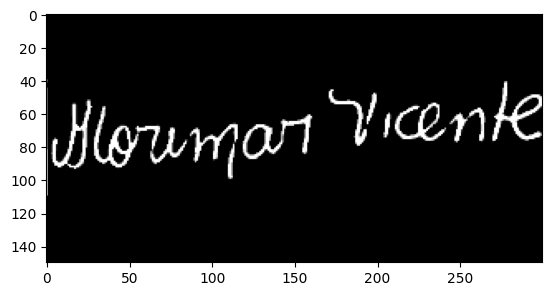

(150, 300, 3)


In [54]:
file_name = "funal.png"
img = cv.imread(file_name)

plt.imshow(img)
plt.show()

print(np.shape(img))

In [55]:
def vectorized_result(j, n):
    e = np.zeros((n))
    e[j - 1] = 1.0
    return e

def load_data():
    train_data = []
    train_labels = []
    n = 10 #23
    m = 24 #24
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            # Открытие файла
            file_name = "../DATA/new_data/{0}/original_{1}_{2}.png".format(i, i, j)
            img = cv.imread(file_name) #, cv.IMREAD_GRAYSCALE
            # img = cv.cvtColor(img, cv.GRAYSCALE2RGB)
            # img = np.reshape(img, (-1, 1))
            img = img.astype("float32")
            train_data.append(img)
            train_labels.append(vectorized_result(i, n))
    
    return (train_data, train_labels)
  

data, labels = load_data()
train_data = np.array(data)
train_labels = np.array(labels)

print(train_data.shape)
print(train_labels.shape)

(240, 150, 300, 3)
(240, 10)


In [56]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.optimizers import Adam

network = Sequential()

network.add(Conv2D(64,(3,3),input_shape=(150, 300, 3),activation='relu'))
network.add(MaxPooling2D(3,3))
network.add(Conv2D(32,(3,3),activation='relu'))
network.add(MaxPooling2D(2,2))
network.add(Flatten())
network.add(Dense(128,activation = 'relu'))
network.add(Dropout(rate=0.3))
network.add(Dense(10,activation = 'softmax'))

network.compile(optimizer=Adam(learning_rate = 0.001),loss="binary_crossentropy",metrics=["accuracy"])
network.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 148, 298, 64)      1792      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 49, 99, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 47, 97, 32)        18464     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 23, 48, 32)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 35328)             0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [57]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]


EPOCHS = 5
BS = 1
progess = network.fit(train_data, train_labels, 
                      batch_size=BS,
                      epochs=EPOCHS, 
                      callbacks=callback_early_stop_reduceLROnPlateau,
                      validation_split=.05)

Epoch 1/5
228/228 [==============================] - 54s 227ms/step - loss: 0.9787 - accuracy: 0.6009 - val_loss: 0.2032 - val_accuracy: 0.6667
Epoch 2/5
228/228 [==============================] - 52s 229ms/step - loss: 0.0909 - accuracy: 0.9254 - val_loss: 0.3647 - val_accuracy: 0.4167
Epoch 3/5
228/228 [==============================] - 51s 223ms/step - loss: 0.0679 - accuracy: 0.9605 - val_loss: 0.6653 - val_accuracy: 0.3333
Epoch 4/5
228/228 [==============================] - 50s 220ms/step - loss: 0.0474 - accuracy: 0.9693 - val_loss: 0.3486 - val_accuracy: 0.7500
Epoch 4: early stopping
